#### What is $R^2$, $r^2$

$R^2$: percentage of variance explained: 1- sum((y_i hat -y_i)^2) / sum((y_i -y_mean)^2) \
$R^2$ equivalent definition: sum((y_i hat -y_mean)^2) / sum((y_i -y_mean)^2) \

yhat : predicted

The graphical intuition behind R2 is shown in Figure 2.2. Suppose you want to predict y. If you don’t
know x, then your best prediction is ¯y but the variability in this prediction is high. If you do know x, then
your prediction will be given by the regression fit. This prediction will be less variable provided there is
some relationship between x and y. R2 is one minus the ratio of the sum of squares for these two predictions.
Thus for perfect predictions the ratio will be zero and R2 will be one.

Watch out: for intercept=0, R^2 becomes invalid! 

#### Gauss-Markov theorem: 
The Gauss-Markov theorem shows that the least squares estimate beta hat is a good choice, but if the errors
are correlated or have unequal variance, there will be better estimators. Even if the errors behave but are
non-normal then non-linear or biased estimates may work better in some sense. So this theorem does not
tell one to use least squares all the time, it just strongly suggests it unless there is some strong reason to do
otherwise.
Situations where estimators other than ordinary least squares should be considered are
1. When the errors are correlated or have unequal variance, generalized least squares should be used.
2. When the error distribution is long-tailed, then robust estimates might be used. Robust estimates are
typically not linear in y.
3. When the predictors are highly correlated (collinear), then biased estimators such as ridge regression
might be preferable.

#### Assumptions about the distributions of errors


#### Testing which model is better - F-test (Faraway p.27)

RSS = $\sum (\hat y_i  -y_i)^2 $

We have big model $\Omega$ with $q$ parameters, and $\omega$ with $p$ parameters (number of parameters is the number of predictors plus one). Their degrees of freedom: $df_\omega = n-p$, $df_\Omega = n-q$. Watch out for alternate definitions where $df = obs - par - 1$ The same test applies when $\omega$ is not only subset of $\Omega$, but also subspace 

Both explain the same $n$ observations. To compare them, do the F test:

1. Calculate their RSS 
1. numerator: difference of RSS over difference of dof
1. denominator: RSS of big model vs dof of big model

Where did we get it from? 
1. Cochran’s theorem: under the assumption of normality, the various quadratic forms are independent and $\chi^2$ distributed.
1. We have a term comparing relative improvement in sums of squares (percent improvement compared to the old model)
1. we have a term coming from the $\chi^2$ distributions for different DOF

$$ F = \frac{ (RSS_\omega - RSS_\Omega) / (q - p) }{RSS_\Omega / (n-q)} = \\ \frac{ (RSS_\omega - RSS_\Omega) / (df_\omega - df_\Omega) }{RSS_\Omega / df_\Omega}$$

If the regression model has been calculated with weights, then replace $RSS$ with $\chi^2$, the weighted sum of squared residuals

The null hypothesis is rejected if the F calculated from the data is greater than the critical value of the F-distribution for some desired false-rejection probability (e.g. 0.05)

`Statsmodels` gives this F-statistic along its p-value (chance of obtaining this F-value by coincidence). This takes all the coeffs at once. Can be used to run more detailed tests: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.f_test.html 


In [3]:
import numpy as np
import statsmodels.api as sm
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
results = sm.OLS(data.endog, data.exog).fit()

# This tests that each coefficient is jointly statistically significantly different from zero.
A = np.identity(len(results.params))
A = A[1:,:]
print(A)
print(results.f_test(A))
# <F test: F=array([[ 330.28533923]]), p=4.984030528700946e-10, df_denom=9, df_num=6>
print(results.fvalue, results.f_pvalue)
# This tests that the coefficient on the 2nd and 3rd regressors are equal 
# and jointly that the coefficient on the 5th and 6th regressors are equal.
B = np.array(([0,0,1,-1,0,0,0],[0,0,0,0,0,1,-1]))
print(B)
print(results.f_test(B))
# <F test: F=array([[ 9.74046187]]), p=0.005605288531708235, df_denom=9, df_num=2>

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
<F test: F=array([[330.28533901]]), p=4.984030543699366e-10, df_denom=9, df_num=6>
330.28533923445286 4.98403052873393e-10
[[ 0  0  1 -1  0  0  0]
 [ 0  0  0  0  0  1 -1]]
<F test: F=array([[9.74046187]]), p=0.005605288531729574, df_denom=9, df_num=2>


Another way is to run ANOVA to compare two nested models (but this works only for formula api): 

In [8]:
dta = sm.datasets.longley.load_pandas().data

from statsmodels.formula.api import ols
formula = 'TOTEMP ~ GNPDEFL + GNP + UNEMP + ARMED + POP + YEAR'
results = ols(formula, dta).fit()
hypotheses = '(GNPDEFL = GNP), (UNEMP = 2), (YEAR/1829 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           4.98e-10
Time:                        22:42:06   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.482e+06    8.9e+05     -3.911      0.0

Example: 
1. Is full model better than prediction by the mean? $H_0$ as all coeffs = 0, $H_1$ (alternate) that the other model performs better. If null rejected, this still doesn't mean that the alternative model is the best model. 

In [34]:
SSY = ((dta['TOTEMP'] - dta['TOTEMP'].mean())**2).sum()
RSS = ((results.resid)**2).sum() # equal to results.ssr

In [60]:
((SSY - RSS) / ((results.df_model+1) - 1)) / (RSS / (results.nobs - (results.df_model+1)))

330.28533923446736

In [85]:
print(results.mse_resid, results.mse_total, results.mse_model)

92936.00616735773 12333921.733333332 30695400.324082296


In [86]:
print(results.mse_total / results.mse_model)

0.4018166110593666


This is what we are given in the table as well:

In [61]:
print(results.f_test(A))


<F test: F=array([[330.28533925]]), p=4.984030527848457e-10, df_denom=9, df_num=6>


#### Influential points

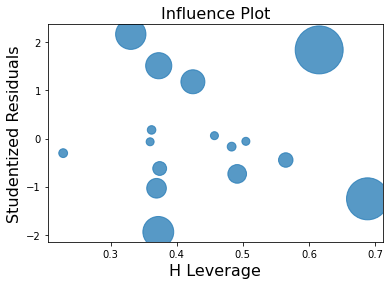

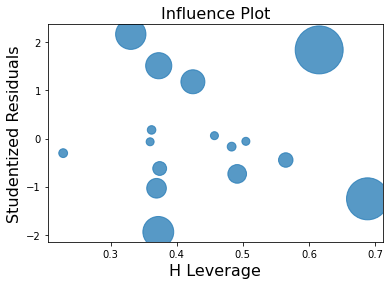

In [78]:
sm.graphics.influence_plot(results)